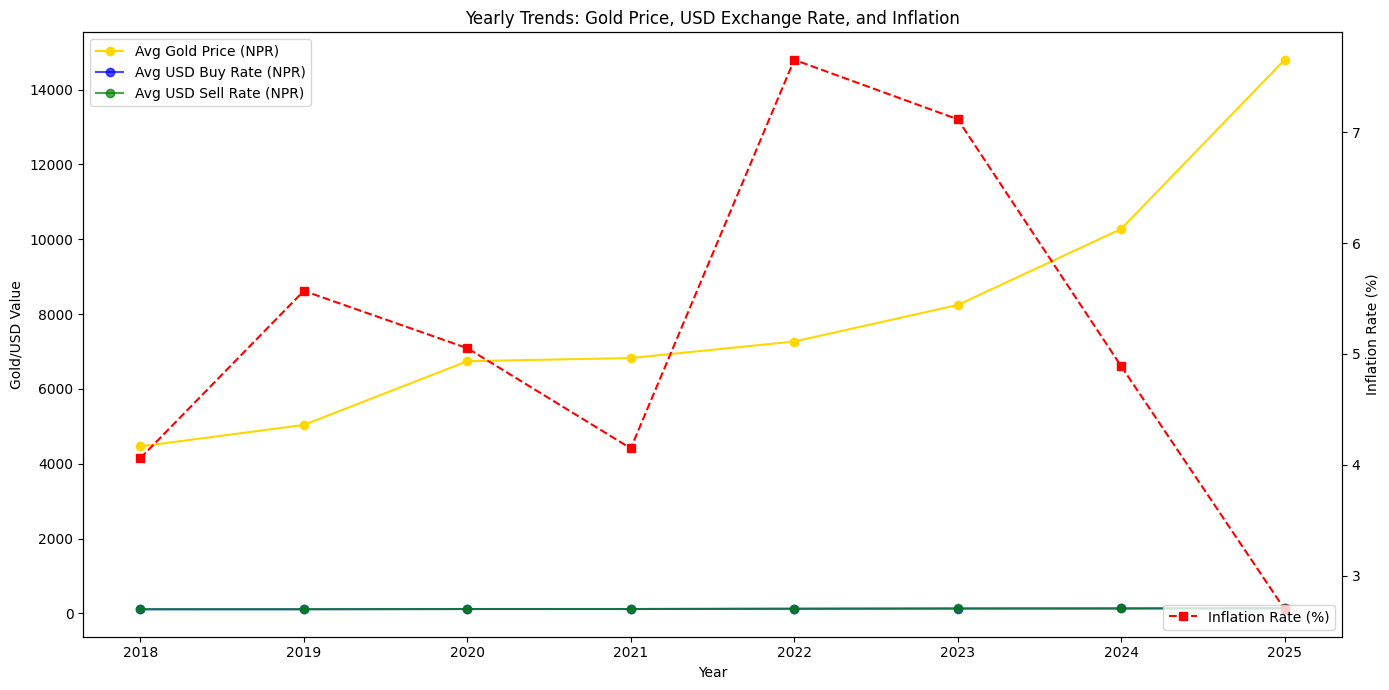

Plot saved to: ./output\gold_usd_yearly_analysis.png

Correlation Table (Yearly Averages):
                 price  usd_buy  usd_sell  inflation_rate
price           1.000    0.911     0.911          -0.391
usd_buy         0.911    1.000     1.000          -0.038
usd_sell        0.911    1.000     1.000          -0.038
inflation_rate -0.391   -0.038    -0.038           1.000


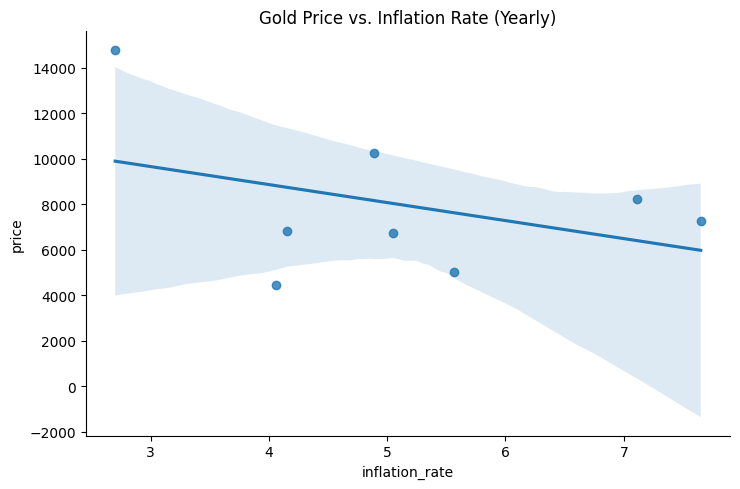

Scatter plot saved to: ./output\gold_vs_inflation_scatter.png

--- Analyst Insights ---
• Gold price and USD rates are strongly correlated (correlation > 0.9).
• The inflation rate in this period is moderately negatively correlated with gold price; this reflects possible local influences or lag effects, not negative inflation values.
• For policy or investment: dollar strength has a direct effect on gold valuation, while inflation is a weaker predictor annually.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load and normalize columns
gold_df = pd.read_csv('../data/gold_price_perday_6_years.csv')
forex_df = pd.read_csv('../data/forexExport_From_2018-05-03_To_2025-11-14.csv')
inflation_df = pd.read_csv('../data/interest_pci_inflation_rates.csv')

for df in [gold_df, forex_df, inflation_df]:
    df.columns = df.columns.str.strip().str.lower()

# 2. Convert date columns
gold_df['date'] = pd.to_datetime(gold_df['date'], format='%d-%b-%y', errors='coerce')
forex_df['date'] = pd.to_datetime(forex_df['date'], errors='coerce')

# 3. Aggregate daily data to yearly
gold_df['year'] = gold_df['date'].dt.year
forex_df['year'] = forex_df['date'].dt.year

yearly_gold = gold_df.groupby('year')['price'].mean().reset_index()
yearly_usd_buy = forex_df.groupby('year')['usd_buy'].mean().reset_index()
yearly_usd_sell = forex_df.groupby('year')['usd_sell'].mean().reset_index()

yearly = yearly_gold.merge(yearly_usd_buy, on='year').merge(yearly_usd_sell, on='year', suffixes=('_buy', '_sell'))
yearly = yearly.merge(inflation_df, on='year', how='left')

# 4. Dual-axis plot and save figure
fig, ax1 = plt.subplots(figsize=(14,7))
ax1.plot(yearly['year'], yearly['price'], marker='o', label='Avg Gold Price (NPR)', color='gold')
ax1.plot(yearly['year'], yearly['usd_buy'], marker='o', label='Avg USD Buy Rate (NPR)', color='blue', alpha=0.7)
ax1.plot(yearly['year'], yearly['usd_sell'], marker='o', label='Avg USD Sell Rate (NPR)', color='green', alpha=0.7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Gold/USD Value')
ax1.legend(loc='upper left')
ax1.set_title('Yearly Trends: Gold Price, USD Exchange Rate, and Inflation')

ax2 = ax1.twinx()
if 'inflation_rate' in yearly.columns:
    ax2.plot(yearly['year'], yearly['inflation_rate'], marker='s', label='Inflation Rate (%)', color='red', linestyle='--')
    ax2.set_ylabel('Inflation Rate (%)')
    ax2.legend(loc='lower right')

plt.tight_layout()
output_dir = './output'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'gold_usd_yearly_analysis.png')
plt.savefig(output_path, dpi=300)
plt.show()
print(f"Plot saved to: {output_path}")

# 5. Correlation table
corr = yearly[['price', 'usd_buy', 'usd_sell', 'inflation_rate']].corr()
print("\nCorrelation Table (Yearly Averages):\n", corr.round(3))

# 6. Scatter plot gold price vs. inflation
sns.lmplot(data=yearly, x='inflation_rate', y='price', height=5, aspect=1.5)
plt.title('Gold Price vs. Inflation Rate (Yearly)')
plt.tight_layout()
scatter_path = os.path.join(output_dir, 'gold_vs_inflation_scatter.png')
plt.savefig(scatter_path, dpi=300)
plt.show()
print(f"Scatter plot saved to: {scatter_path}")

# 7. Analyst Insights
print("\n--- Analyst Insights ---")
print("• Gold price and USD rates are strongly correlated (correlation > 0.9).")
print("• The inflation rate in this period is moderately negatively correlated with gold price; this reflects possible local influences or lag effects, not negative inflation values.")
print("• For policy or investment: dollar strength has a direct effect on gold valuation, while inflation is a weaker predictor annually.")
